In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine


In [2]:
wine = load_wine()


# The names of the dataset columns.

wine.feature_names

data_cols = ['alcohol', 'malic acid','ash','alcalinity of ash','magnesium','total phenols','flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'OD280/OD315 of diluted wines', 'proline']


The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

In [3]:
# The names of target classes.

wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Here are the columns for each of the variables:

alcohol = wine.data[:,0]

malic acid = wine.data[:,1]

ash = wine.data[:,2]

alcalinity_of_ash = wine.data[:,3]

magnesium = wine.data[:,4]

total_phenols = wine.data[:,5]

flavanoids = wine.data[:,6]

flavanoid_phenols = wine.data[:,7]

proanthocyanins = wine.data[:,8]

color_intensity = wine.data[:,9]

hue = wine.data[:,10]

od280/od315_of_diluted_wines = wine.data[:,11]

proline = wine.data[:,12]


## Quick look at all of the data currently

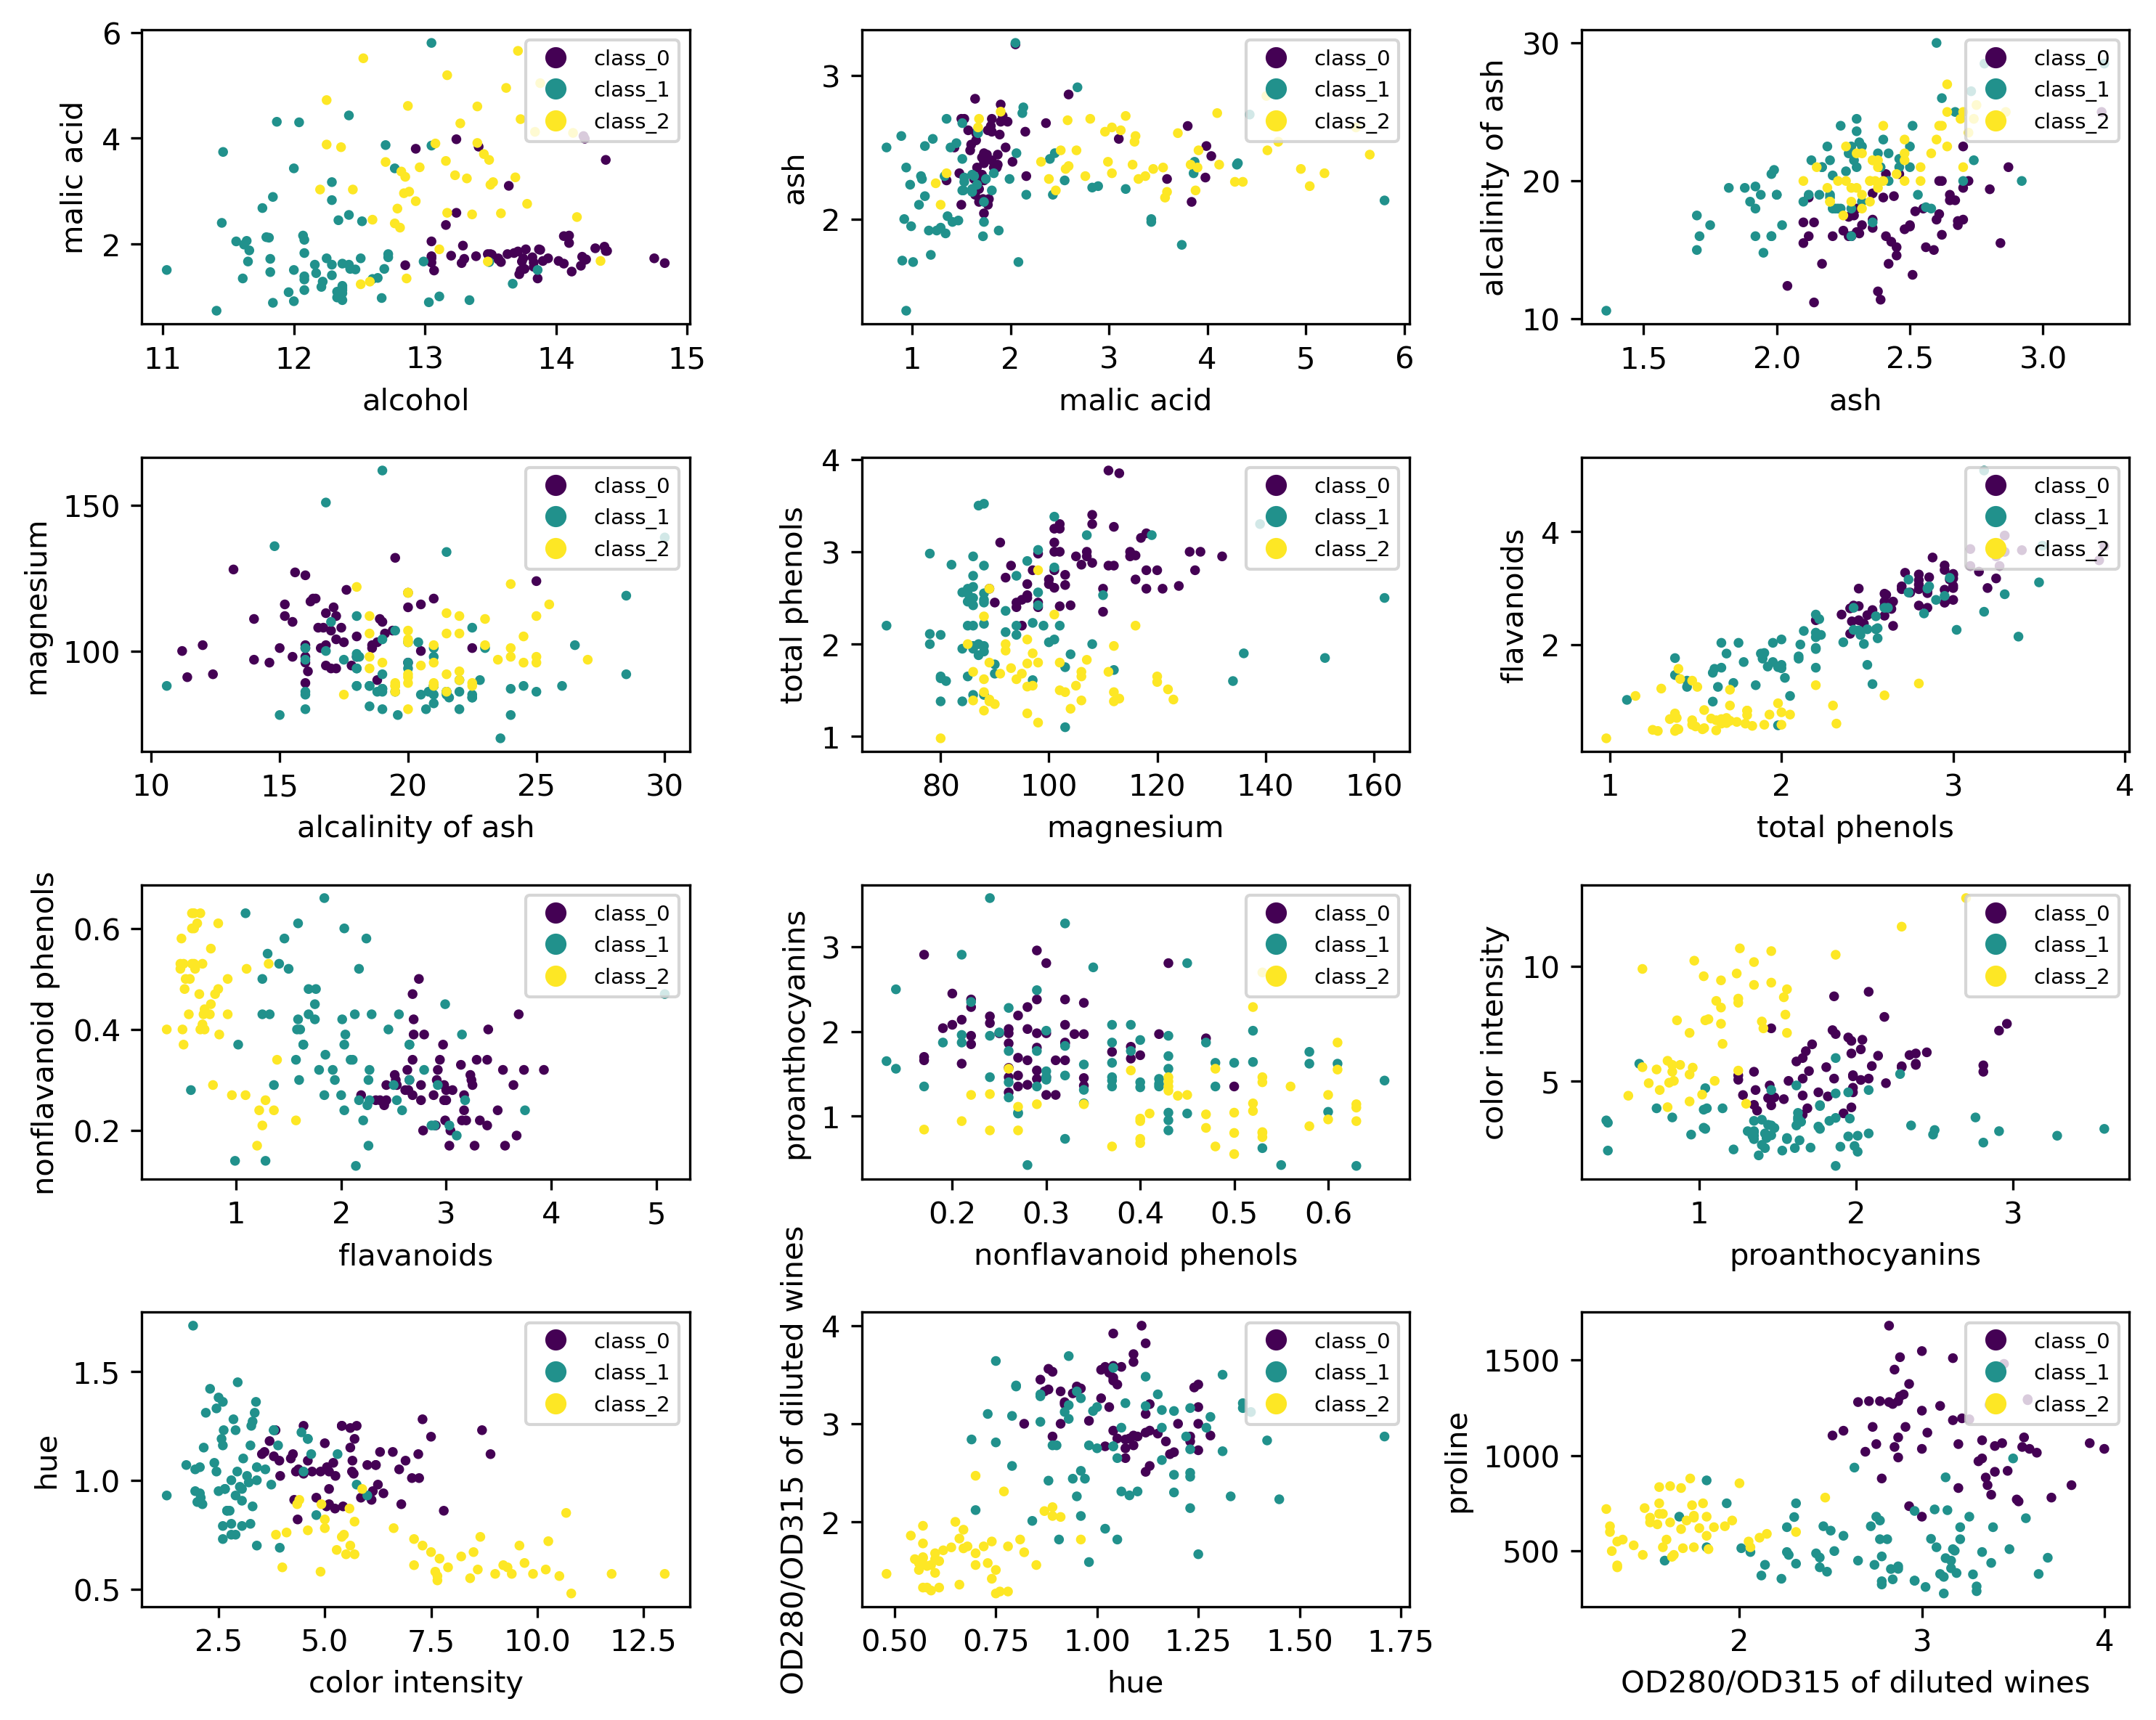

In [4]:

label = wine.target_names

nrows, ncols = 4, 3 # looks at all measurements compared to their neighbor parameter
fig = plt.figure(figsize = (10,8), dpi = 300)

for i in range(1, 13):
    ax = fig.add_subplot(nrows, ncols, i)
    PltScat = ax.scatter(wine.data[:,i-1], wine.data[:,i], s=5, c = wine.target)
    ax.set_xlabel(data_cols[i-1])
    ax.set_ylabel(data_cols[i])
    ax.legend(PltScat.legend_elements()[0],label,loc = 'upper right', fontsize = 7)

plt.tight_layout()
plt.show()

# Part One

## Simple MLPClassifier model to predict the wine class

In [5]:
from sklearn.model_selection import train_test_split

X = wine.data # predictors
y = wine.target # target

# Split wine data in train and test data (80:20)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1) # 20% reserved for the test group
   


In [6]:
# scale the training data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.neural_network import MLPClassifier

# create a classifier with three layers of 10 nodes each
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2500, random_state = 1)

# now fit the classifer to the training data
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2500, random_state=1)

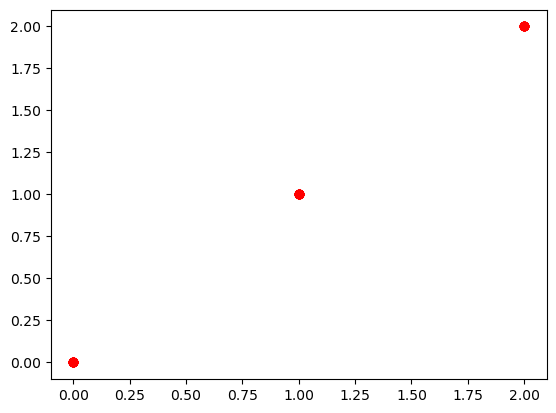

In [8]:
# try making some predictions using your classifier
pred = mlp.predict(X_test)

plt.plot(y_test, pred, 'ro')
#plt.plot([0, 2], [0, 2],'k')

In [9]:
# and now test your predictions

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# Part Two

## Now test how well different # of layers performs

In [10]:
# now build a loop to test how well different number of hidden layers performs

scores_layers = {}
scores_layers_list = []
l_range = range(1,4,1)

from sklearn import metrics

for l in l_range:
    print(l)
    mlp_layers = MLPClassifier(hidden_layer_sizes=(l, l, l), max_iter=2500,random_state=1)
    mlp_layers.fit(X_train, y_train)
    y_pred_layers = mlp_layers.predict(X_test)
    scores_layers[l] = metrics.accuracy_score(y_test,y_pred_layers)
    scores_layers_list.append(metrics.accuracy_score(y_test,y_pred_layers))

1
2
3


Text(0, 0.5, 'accuracy score')

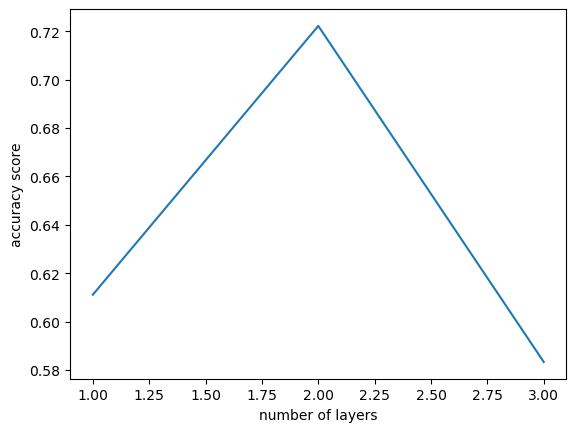

In [11]:
# plot the model accuracy for each value of k

plt.plot(l_range,scores_layers_list)
plt.xlabel('number of layers')
plt.ylabel('accuracy score')

## Now test how well different # of neurons performs

In [12]:
scores_neur = {}
scores_neur_list = []

n = range(1,11,1) # nodes

for i in n:
    mlp_neur = MLPClassifier(hidden_layer_sizes=(i), max_iter=2500,random_state=1)
    mlp_neur.fit(X_train, y_train)
    y_pred_neur = mlp_neur.predict(X_test)
    scores_neur[l] = metrics.accuracy_score(y_test,y_pred_neur)
    scores_neur_list.append(metrics.accuracy_score(y_test,y_pred_neur))
    print('Neurons = ',i)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred_neur))

Neurons =  1
Confusion Matrix
[[14  0  0]
 [ 0 12  1]
 [ 0  2  7]]
Neurons =  2
Confusion Matrix
[[14  0  0]
 [ 0 13  0]
 [ 9  0  0]]
Neurons =  3
Confusion Matrix
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Neurons =  4
Confusion Matrix
[[14  0  0]
 [ 1 12  0]
 [ 0  1  8]]
Neurons =  5
Confusion Matrix
[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]
Neurons =  6
Confusion Matrix
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Neurons =  7
Confusion Matrix
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Neurons =  8
Confusion Matrix
[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]
Neurons =  9
Confusion Matrix
[[14  0  0]
 [ 0 13  0]
 [ 0  1  8]]
Neurons =  10
Confusion Matrix
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]


Text(0, 0.5, 'accuracy score')

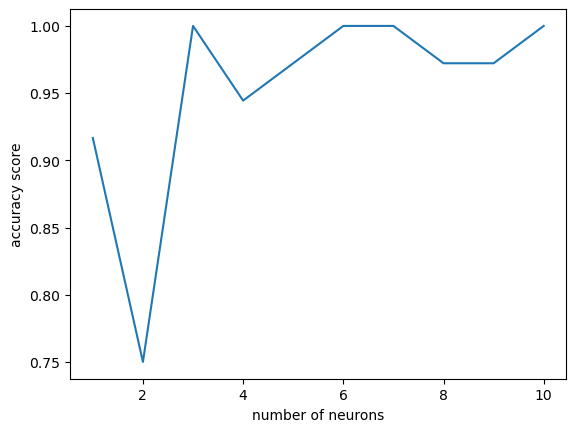

In [13]:
# plot the model accuracy for each value of k

plt.plot(n,scores_neur_list)
plt.xlabel('number of neurons')
plt.ylabel('accuracy score')

## Now determine combination of # layers and # neurons for optimal MLPClassifier model 

In [14]:
# now build a loop to test how well different number of hidden layers performs

scores = {}
scores_list = []

from sklearn import metrics


from sklearn.neural_network import MLPClassifier
n = range(1,11,1) # nodes

#build a nested loop to loop through both various numbers of layers and nodes
l = range(1,4,1)
for l in l:
    layers = np.ones(l, dtype=np.int8) #create an array of ones that loops with l
    print(layers)
    for i in n:
        mlp = MLPClassifier(hidden_layer_sizes=(i*layers), max_iter=2500, random_state=1)
        
        # train model to the training dataset
        mlp.fit(X_train, y_train)
        
        # predict
        y_pred = mlp.predict(X_test)
        
        scores[l] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))
  

[1]
[1 1]
[1 1 1]


In [15]:
# create the polt of # layers bs accuracy...3 points per neuron...so accuracy score of L1N1 L2N1 and L3N1 for # neuorns as color coordinated

# print individual list of scores for each neuron...first value is layer 1, second is layer 2, and third is layer 3

N1_scores = scores_list[0:30:10]
print('N1 scores = ', N1_scores)

N2_scores = scores_list[1:30:10]
print('N2 scores = ', N2_scores)

N3_scores = scores_list[2:30:10]
print('N3 scores = ', N3_scores)

N4_scores = scores_list[3:30:10]
print('N4 scores = ', N4_scores)

N5_scores = scores_list[4:30:10]
print('N5 scores = ', N5_scores)

N6_scores = scores_list[5:30:10]
print('N6 scores = ', N6_scores)

N7_scores = scores_list[6:30:10]
print('N7 scores = ', N7_scores)

N8_scores = scores_list[7:30:10]
print('N8 scores = ', N8_scores)

N9_scores = scores_list[8:30:10]
print('N9 scores = ', N9_scores)

N10_scores = scores_list[9:30:10]
print('N10 scores = ', N10_scores)



N1 scores =  [0.9166666666666666, 0.6111111111111112, 0.6111111111111112]
N2 scores =  [0.75, 1.0, 0.7222222222222222]
N3 scores =  [1.0, 1.0, 0.5833333333333334]
N4 scores =  [0.9444444444444444, 0.9722222222222222, 0.9722222222222222]
N5 scores =  [0.9722222222222222, 0.9722222222222222, 1.0]
N6 scores =  [1.0, 1.0, 0.9444444444444444]
N7 scores =  [1.0, 1.0, 1.0]
N8 scores =  [0.9722222222222222, 0.9722222222222222, 1.0]
N9 scores =  [0.9722222222222222, 0.9444444444444444, 0.9444444444444444]
N10 scores =  [1.0, 0.9722222222222222, 1.0]


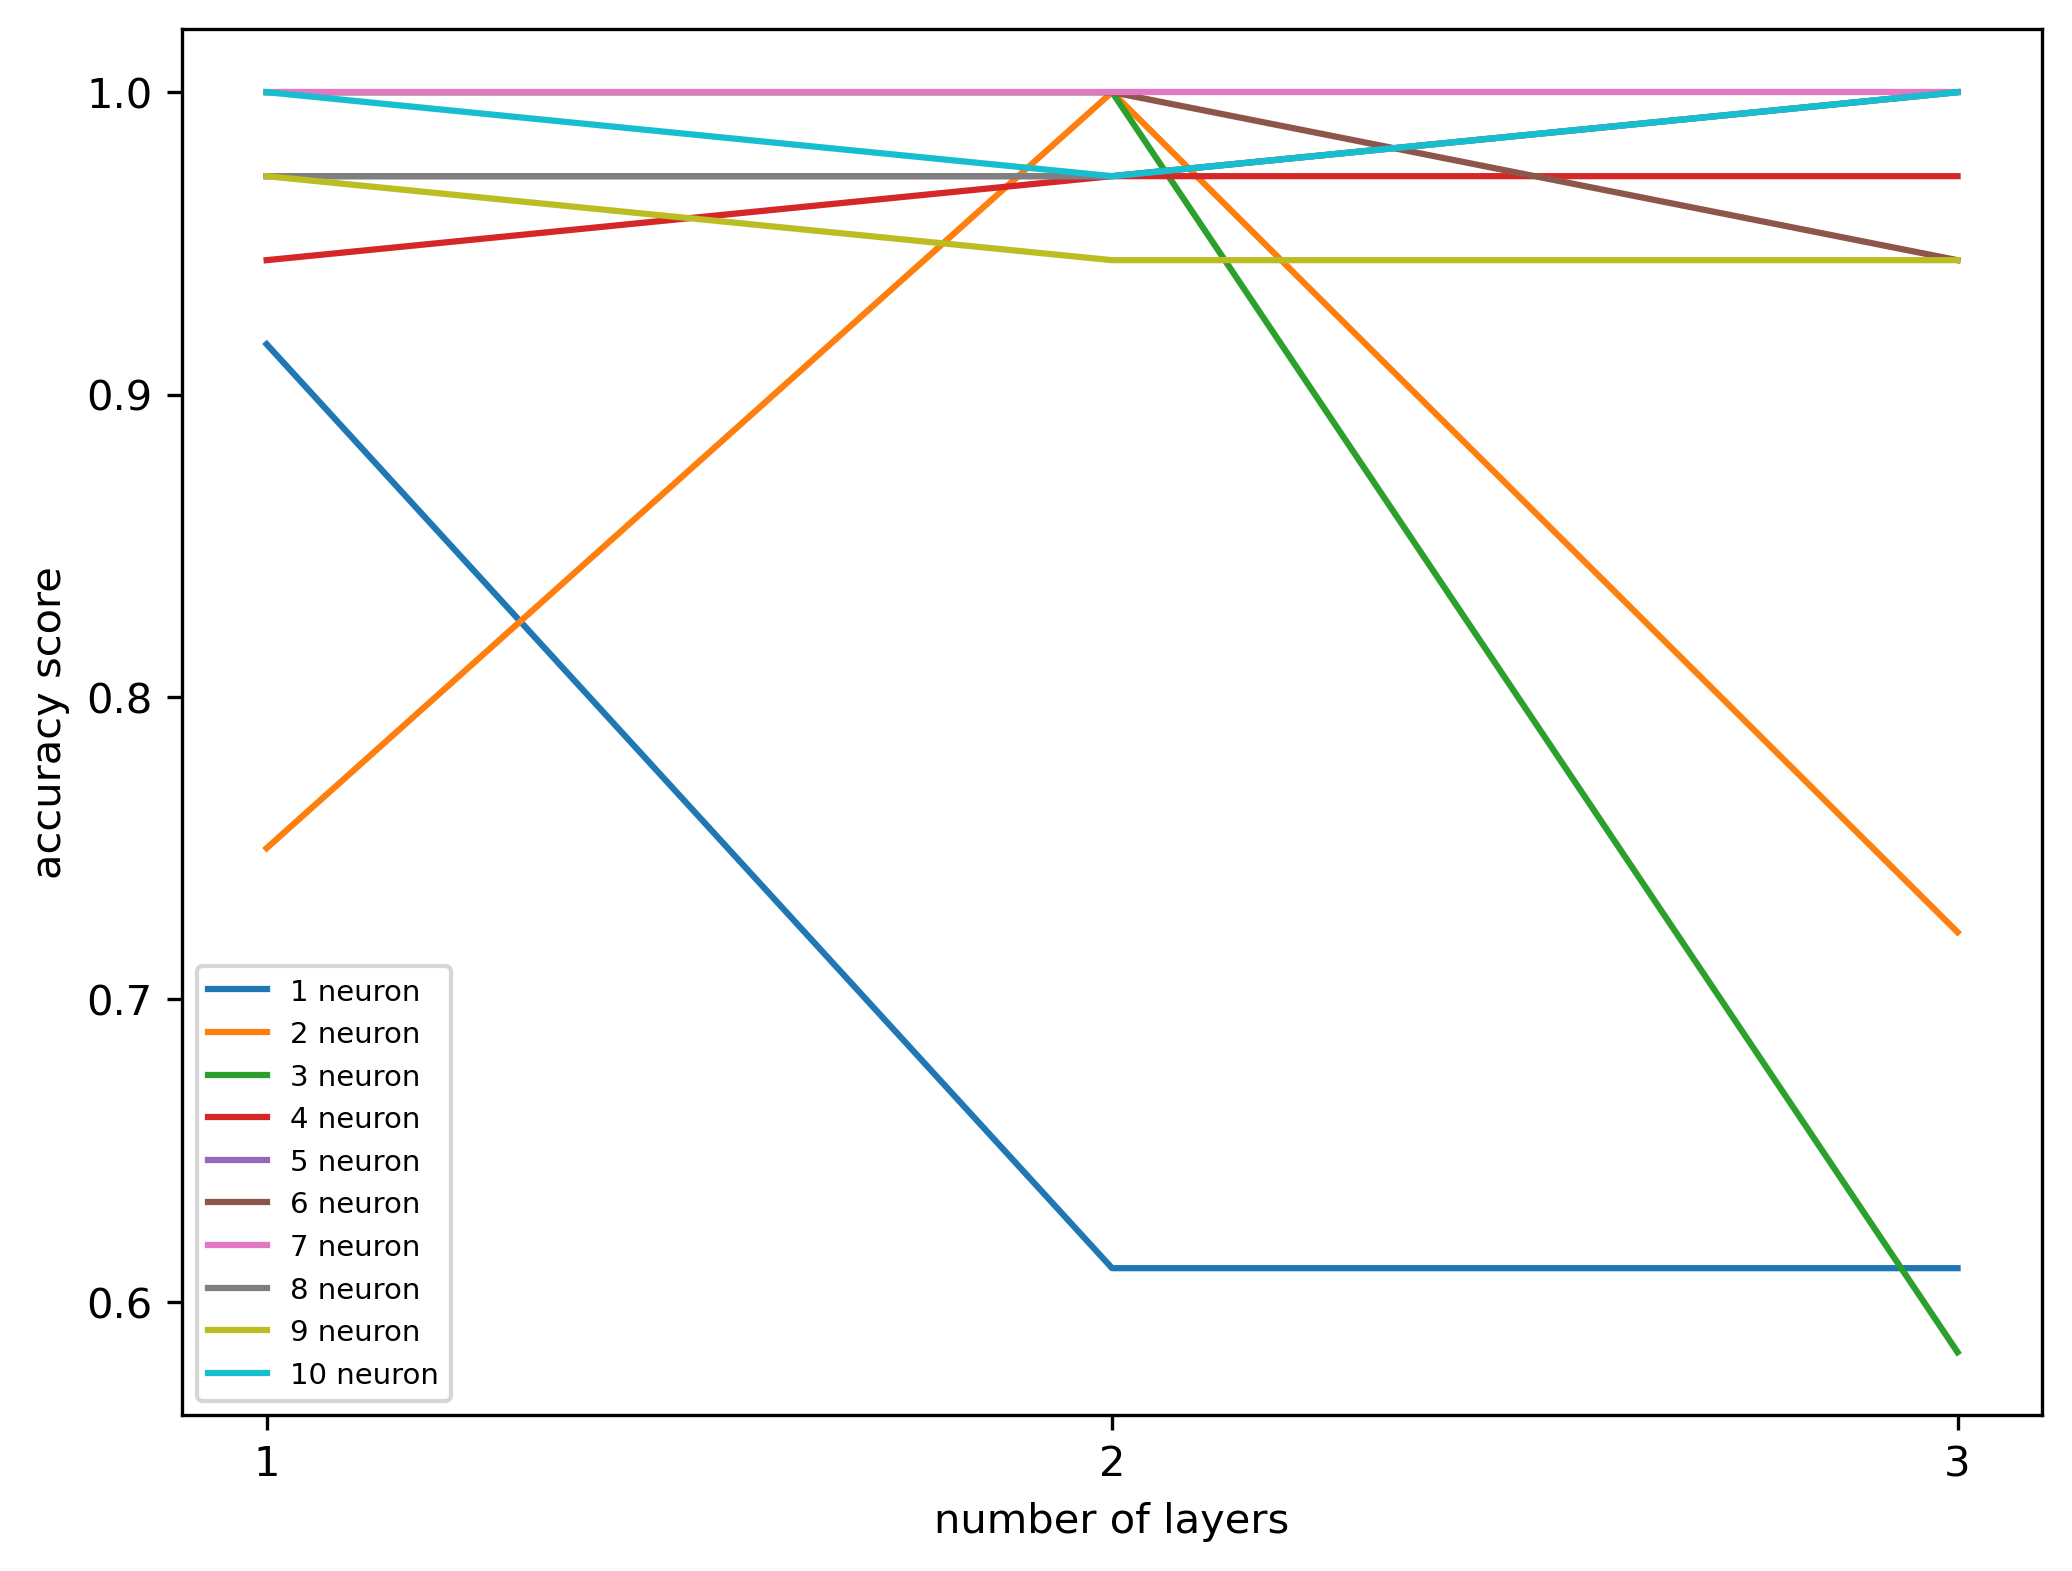

In [16]:
# Come back to this because right now with a nested loop, it is looking for only 
# the 3 layers but the score_list is 30 values long (3 layers x 10 neuorns)
# length of l_range and scores_list doesn't match


# ******************************************************************************* #

# plot the model accuracy for each layer/neuron
fig = plt.figure(figsize = (8,6), dpi = 300)

plt.plot(l_range,N1_scores, label = '1 neuron')
plt.plot(l_range,N2_scores, label = '2 neuron')
plt.plot(l_range,N3_scores, label = '3 neuron')
plt.plot(l_range,N4_scores, label = '4 neuron')
plt.plot(l_range,N5_scores, label = '5 neuron')
plt.plot(l_range,N6_scores, label = '6 neuron')
plt.plot(l_range,N7_scores, label = '7 neuron')
plt.plot(l_range,N8_scores, label = '8 neuron')
plt.plot(l_range,N9_scores, label = '9 neuron')
plt.plot(l_range,N10_scores, label = '10 neuron')


plt.xlabel('number of layers')
plt.ylabel('accuracy score')

plt.xticks(np.arange(1, 4, step=1))  # Set label locations.
plt.legend(loc = 'lower left', fontsize = 7)


## Trying to display the accuracy from the nested loop in another way

In [17]:
L1_scores = scores_list[0:10:1]
print('L1 scores = ', L1_scores)

L2_scores = scores_list[10:20:1]
print('L2 scores = ', L2_scores)

L3_scores = scores_list[20:30:1]
print('L3 scores = ', L3_scores)

L1 scores =  [0.9166666666666666, 0.75, 1.0, 0.9444444444444444, 0.9722222222222222, 1.0, 1.0, 0.9722222222222222, 0.9722222222222222, 1.0]
L2 scores =  [0.6111111111111112, 1.0, 1.0, 0.9722222222222222, 0.9722222222222222, 1.0, 1.0, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222]
L3 scores =  [0.6111111111111112, 0.7222222222222222, 0.5833333333333334, 0.9722222222222222, 1.0, 0.9444444444444444, 1.0, 1.0, 0.9444444444444444, 1.0]


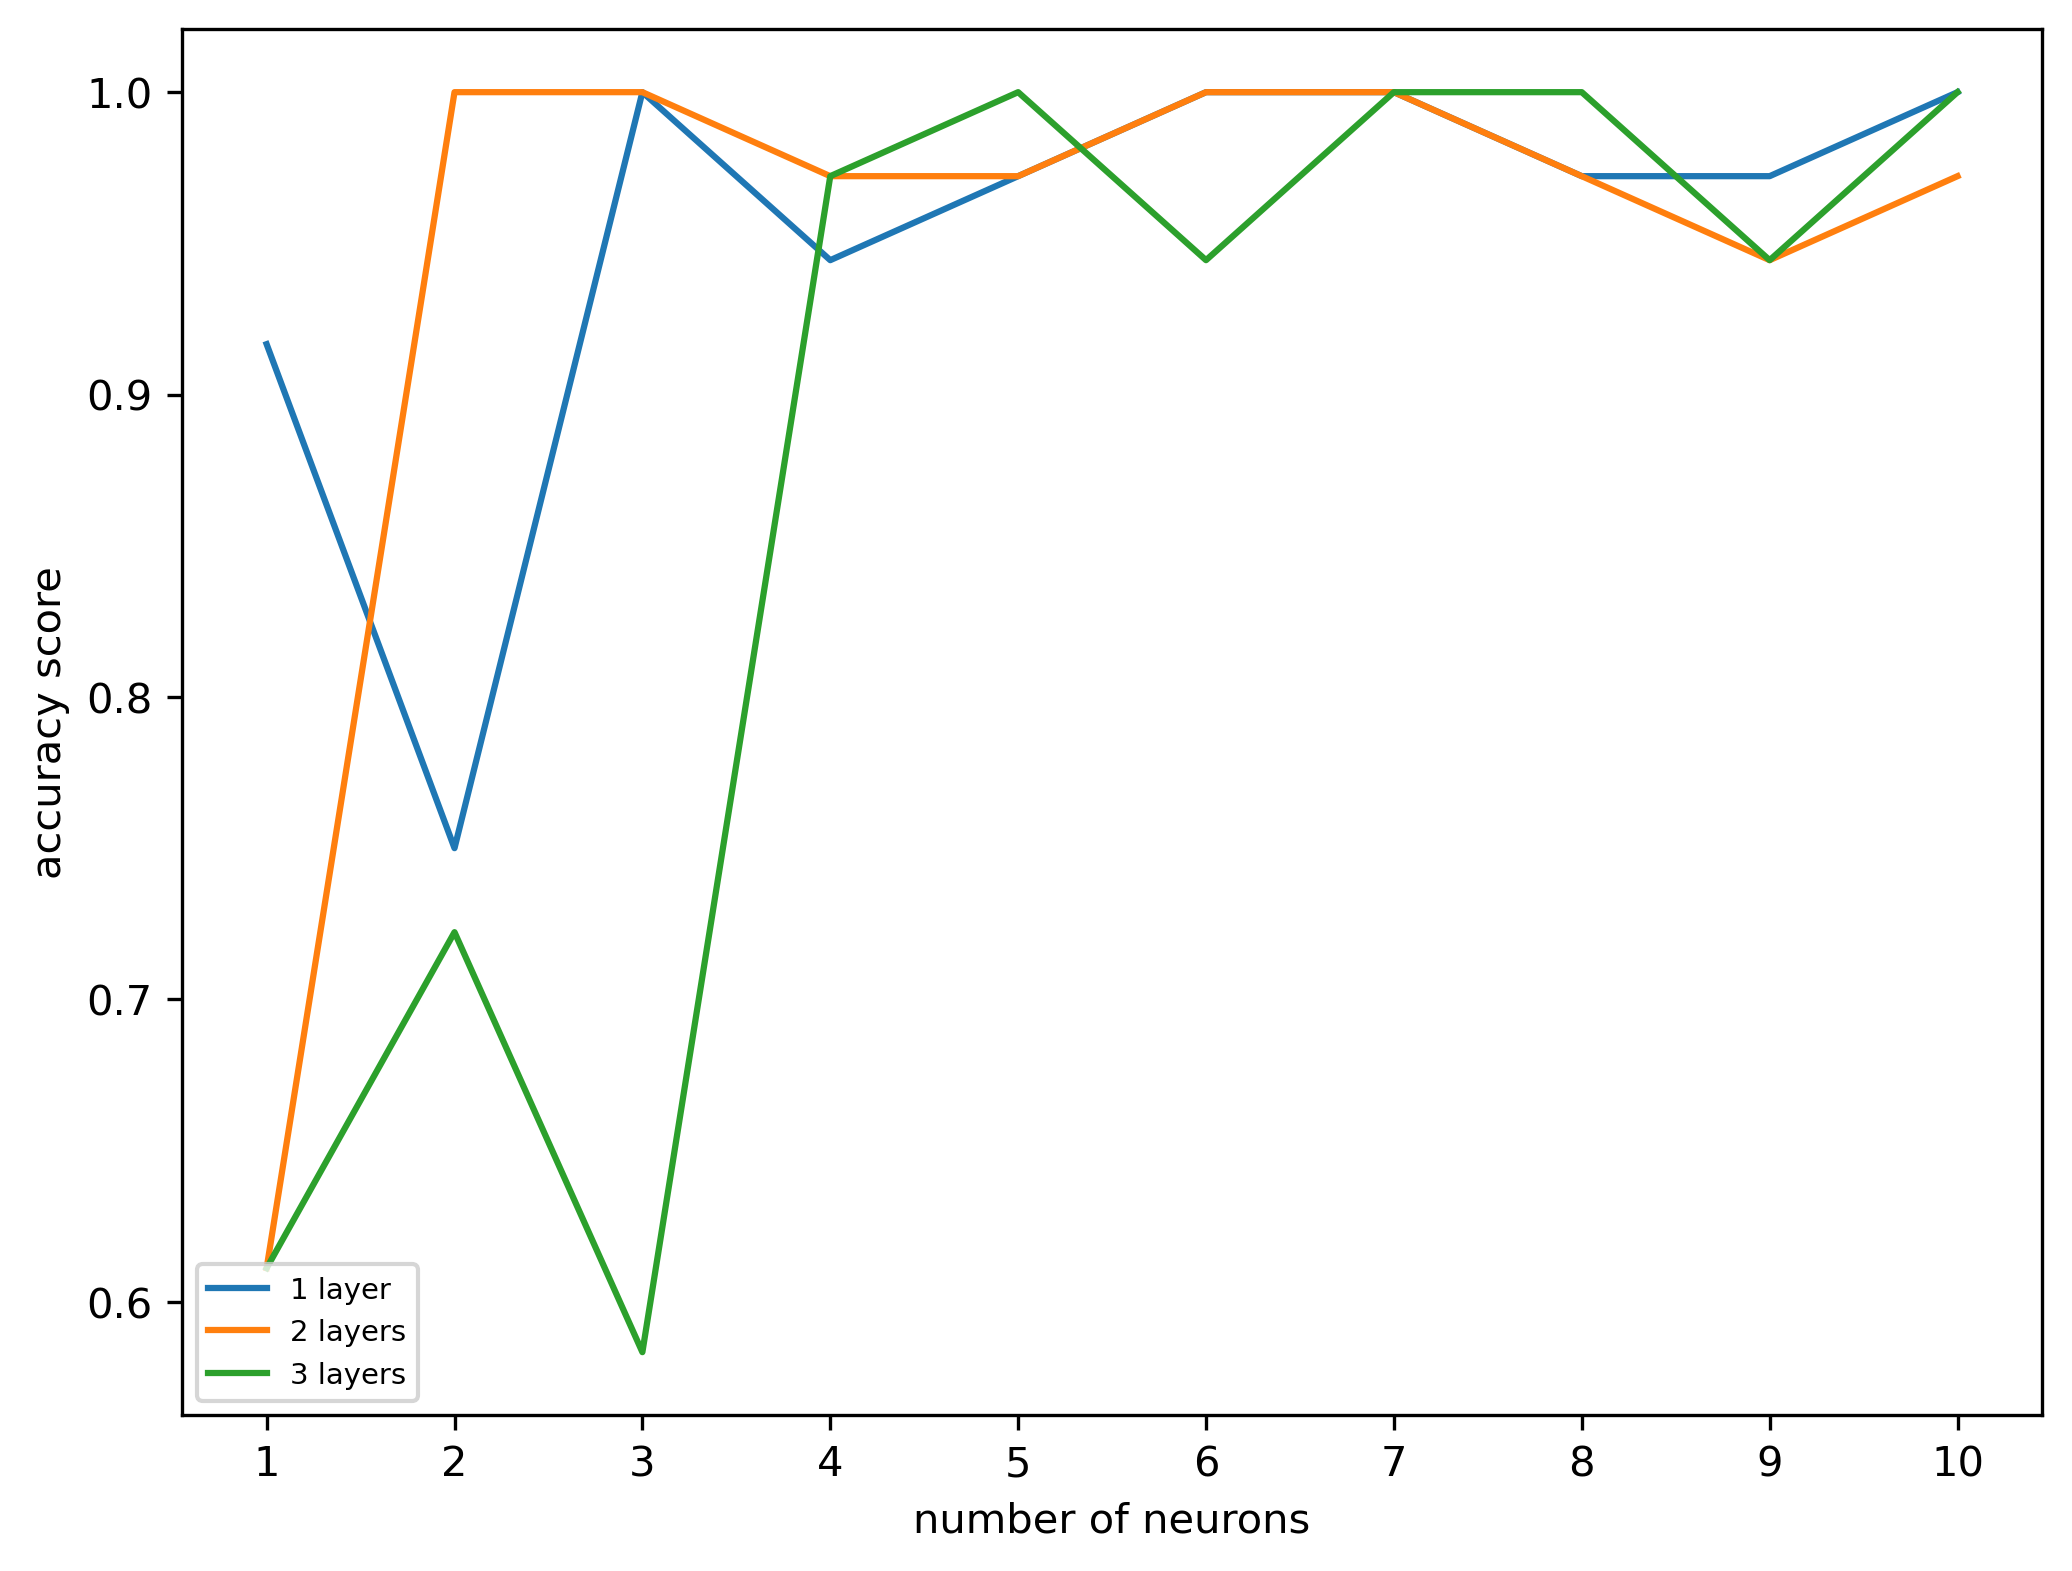

In [18]:
# plot the model accuracy for each neuron/layer
fig = plt.figure(figsize = (8,6), dpi = 300)

plt.plot(n,L1_scores, label = '1 layer')
plt.plot(n,L2_scores, label = '2 layers')
plt.plot(n,L3_scores, label = '3 layers')


plt.xlabel('number of neurons')
plt.ylabel('accuracy score')

plt.xticks(np.arange(1, 11, step=1))  # Set label locations
plt.legend(loc = 'lower left', fontsize = 7)

### Write a short paragraph explaining your results. If more than one combination of layers/neurons results in a high accuracy score (>0.9), discuss which combination of layers/neurons you would use and why.

Of the 30 combinations of layers and neurons run in the MLPClassifier model, only 5 of the combinations did not yield a high accuracy score.  In the 1 layer model, if 1 or 3-10 neurons were selected, the model performed well.  And neurons 2-10 for the 2 layer model and neurons 4-10 in the 3 layer model. However, when choosing which combination of layers/neurons to use for my model, I would be cautious of overfitting my dataset.  For example, if my 1 layer/2 neuron model performs well and yields a high accuracy score (which it does not), it might not make sense to use any more neurons or layers for a simple model.  Although from the results above, when we use 4 neurons or more, the model yields high accuracy on all layers (whether 1, 2 or 3 implemented). However, for part 3, I am choosing to apply the 2 layer model with 2 neurons because too many neurons becomes computationally inefficient and becomes more prone to overfitting the dataset (what I am trying to avoid). 

## Confusion matrices and classification report for 1 layered model with neurons 3-10

In [19]:
# Printing confusion matrices for neurons 3-10 for the 1 layered MLPClassifier

scores_neur_1 = {}
scores_neur_1_list = []

n_high = range(3,11,1) # nodes

for i in n_high:
    mlp_neur_1 = MLPClassifier(hidden_layer_sizes=(i), max_iter=2500,random_state=1)
    mlp_neur_1.fit(X_train, y_train)
    y_pred_neur_1 = mlp_neur_1.predict(X_test)
    scores_neur_1[l] = metrics.accuracy_score(y_test,y_pred_neur_1)
    scores_neur_1_list.append(metrics.accuracy_score(y_test,y_pred_neur_1))
    print('Neurons = ',i)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred_neur_1))

    print('Classification Report')
    print(classification_report(y_test,y_pred_neur_1))

Neurons =  3
Confusion Matrix
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Neurons =  4
Confusion Matrix
[[14  0  0]
 [ 1 12  0]
 [ 0  1  8]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.92      0.92        13
           2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36

Neurons =  5
Confusion Matrix
[[14  0  0]
 [ 1 12  0]
 [ 0  

## Confusion matrices and classification report for 2 layered model with neurons 2-10

In [20]:
# Printing confusion matrices for neurons 2-10 for the 2 layered MLPClassifier

scores_neur_2 = {}
scores_neur_2_list = []

n_high_2 = range(2,11,1) # nodes

for i in n_high_2:
    mlp_neur_2 = MLPClassifier(hidden_layer_sizes=(i,i), max_iter=2500,random_state=1)
    mlp_neur_2.fit(X_train, y_train)
    y_pred_neur_2 = mlp_neur_2.predict(X_test)
    scores_neur_2[l] = metrics.accuracy_score(y_test,y_pred_neur_2)
    scores_neur_2_list.append(metrics.accuracy_score(y_test,y_pred_neur_2))
    print('Neurons = ',i)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred_neur_2))

    print('Classification Report')
    print(classification_report(y_test,y_pred_neur_2))

Neurons =  2
Confusion Matrix
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Neurons =  3
Confusion Matrix
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Neurons =  4
Confusion Matrix
[[14  0  0]
 [ 1 12  0]
 [ 0  

## Confusion matrices and classification report for 3 layered model with neurons 4-10

In [21]:
# Printing confusion matrices for neurons 3-10 for the 3 layered MLPClassifier

scores_neur_3 = {}
scores_neur_3_list = []

n_high_3 = range(4,11,1) # nodes

for i in n_high_3:
    mlp_neur_3 = MLPClassifier(hidden_layer_sizes=(i,i), max_iter=2500,random_state=1)
    mlp_neur_3.fit(X_train, y_train)
    y_pred_neur_3 = mlp_neur_3.predict(X_test)
    scores_neur_3[l] = metrics.accuracy_score(y_test,y_pred_neur_3)
    scores_neur_3_list.append(metrics.accuracy_score(y_test,y_pred_neur_3))
    print('Neurons = ',i)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred_neur_3))

    print('Classification Report')
    print(classification_report(y_test,y_pred_neur_3))

Neurons =  4
Confusion Matrix
[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Neurons =  5
Confusion Matrix
[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Neurons =  6
Confusion Matrix
[[14  0  0]
 [ 0 13  0]
 [ 0  

### Choosing the 2 layered model with 2 neurons to apply to the unknown dataset

# Part Three

## Apply tuned model to unknown wine dataset

In [22]:
# import the data

unknown = pd.read_csv("C:/Users/nicol/OEAS_895/datasets/unknown_wine.csv")
print(unknown.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [23]:
X_unknown = unknown # predictors

print(X_unknown)

     alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0   2.480115    1.577093  1.766757           7.542816  43.456511   
1   1.074171    1.125832  2.557246           4.421963  57.339151   
2   3.516777    0.819709  0.462774           2.328977  60.776751   
3  13.189798    1.402826  0.153316           7.621558   0.440191   
4  11.973053    1.838887  0.945975           1.269000  83.484182   
5   2.284138    0.048992  0.211198           4.088945  18.957613   
6   9.463899    0.787199  1.863438          16.869074  31.736868   
7   6.453939    1.676532  2.153574          13.765152  70.390073   
8  12.740552    2.854646  0.932969           8.626371  44.557706   
9   9.686586    1.232883  1.475132           3.560106  12.221049   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.569810    0.075239              0.267335         0.744527   
1       1.677453    1.027255              0.266734         1.037521   
2       0.950360    2.312480          

Manually stepped through all 25 possible combinations that yielded a high accuracy (>0.9).  Only showing one of the combinations below using the 2 layers with 2 neurons.  

### Find a scikit-learn function that will give the probability that each unknown wine fits into each of one of the three target classes. List the probabilities for each unknown sample for each target class and comment on your results.

In [24]:
mlp_unknown = MLPClassifier(hidden_layer_sizes=(2,2), max_iter=2500,random_state=1)
mlp_unknown.fit(X_train, y_train)
y_pred_unknown = mlp_unknown.predict(X_unknown)

mlp_unknown.predict_proba(X_unknown) # lists the probabilities for each unknown sample (10) and for each target class (3)

C:\Users\nicol\anaconda3\envs\env_data_sci\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\nicol\anaconda3\envs\env_data_sci\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 5.33590898e-322, 1.67953345e-230],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.36833610e-175, 3.57827721e-126],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.06745213e-115, 1.70372910e-083],
       [1.00000000e+000, 0.00000000e+000, 2.08836993e-262],
       [1.00000000e+000, 6.64313021e-268, 5.92979915e-192]])

Of the 25 combinations that yielded a high accuracy, 23 of them yielded the same predictions. Those 23 combinations indicated that those 10 unknown wines had a overwhelmingly high probability (near 1) of belonging to class 0.  However, if the 3 layered model with 4 neurons was applied, it gave the overwhelmingly high probability of all 10 unknown wines belonging to class 2, and then for the 3 layered model with 10 neurons gave high probability for all 10 wines belonging to class 1.